In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc('font', family='AppleGothic') #한글 깨짐 방지 설정

In [2]:
train_df = pd.read_csv('./open/train.csv')
train_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [4]:
train_df.describe(include='all')

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
count,96294,9.629400e+04,96294,96294,96294,9.629400e+04,96294.000000,96294.000000,96294,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294
unique,96294,NaN,2,16,4,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,7
top,TRAIN_00000,NaN,36 months,10+ years,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN,B
freq,1,NaN,64479,31585,47934,NaN,NaN,NaN,55150,NaN,NaN,NaN,NaN,NaN,28817
mean,NaN,1.830400e+07,NaN,NaN,NaN,9.392672e+07,19.379590,25.304827,NaN,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,NaN
std,NaN,1.032908e+07,NaN,NaN,NaN,9.956871e+07,33.569559,12.088566,NaN,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,NaN
min,NaN,1.200000e+06,NaN,NaN,NaN,0.000000e+00,0.000000,4.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,NaN,1.020000e+07,NaN,NaN,NaN,5.760000e+07,12.650000,17.000000,NaN,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,NaN
50%,NaN,1.680000e+07,NaN,NaN,NaN,7.800000e+07,18.740000,24.000000,NaN,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,NaN
75%,NaN,2.400000e+07,NaN,NaN,NaN,1.128000e+08,25.540000,32.000000,NaN,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,NaN


In [5]:
# train set에 있는 주택소유상태 = 'ANY'인 것 삭제, test set에는 없는 항목이고 train set에도 1개 밖에 되지 않아 삭제하는 것이 좋다고 판단.

train_df = train_df[train_df['주택소유상태']!= 'ANY']

In [6]:
# 근로기간 컬럼 중복된 항목 합치기
# 함수 선언

def unit_standardization(x):
    if (x == '10+ years') or (x == '10+years'):
        return '10년이상'
    elif x == '9 years':
        return '9'
    elif x == '8 years':
        return '8'
    elif x == '7 years':
        return '7'
    elif x == '6 years':
        return '6'
    elif x == '5 years':
        return '5'
    elif x == '4 years':
        return '4'
    elif (x == '3 years') or (x == '3'):
        return '3'
    elif x == '2 years':
        return '2'
    elif (x == '1 year') or (x == '1 years'):
        return '1'
    elif (x == '< 1 year') or (x == '<1 year') :
        return '1년이하'
    else:
        return 'Unknown'

In [7]:
# train set에 적용

train_df['근로기간'] = train_df['근로기간'].apply(unit_standardization)

In [8]:
# 대출기간 범주형 --> 수치형으로 변경
# 함수 선언

def conv_loan_period(x):
    if x == ' 36 months':
        return 36
    else:
        return 60

In [9]:
# train set에 적용

train_df['대출기간'] = train_df['대출기간'].apply(conv_loan_period)

In [10]:
display(train_df.head(3))

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,10년이상,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [11]:
# 파생변수 생성하기

train_df['총상환액'] = train_df['총상환원금'] + train_df['총상환이자']

In [12]:
train_df['총상환대출비율'] = train_df['총상환액'] / train_df['대출금액']
train_df['월별대출금액'] = train_df['대출금액'] / train_df['대출기간']

In [13]:
#수치형 데이터 로그 스케일링 적용

numeric_columns = train_df.select_dtypes(include=[np.number]).columns

train_df[numeric_columns] = np.log1p(train_df[numeric_columns])

In [14]:
train_df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,16.339638,3.610918,6,RENT,18.092177,2.990720,2.772589,부채 통합,0.0,0.000000,0.000000,0.0,0.0,C,0.000000,0.000000,12.756122
1,TRAIN_00001,16.482739,4.110874,10년이상,MORTGAGE,18.689180,3.149740,3.091042,주택 개선,0.0,12.830869,12.363337,0.0,0.0,B,13.317326,0.041331,12.388398
2,TRAIN_00002,16.300417,3.610918,5,MORTGAGE,18.379859,2.261763,2.708050,부채 통합,0.0,13.741482,11.931274,0.0,0.0,A,13.893017,0.086223,12.716901


In [15]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

In [16]:
# MinMaxScaler 객체 생성
mm_scaler = MinMaxScaler()

In [17]:
# 선택한 컬럼들에 대해 스케일링 적용
train_df[numeric_columns] = mm_scaler.fit_transform(train_df[numeric_columns])

In [18]:
# 범주형데이터 인코딩

from sklearn.preprocessing import LabelEncoder

In [19]:
# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

In [20]:
encoding_list = ['근로기간', '주택소유상태', '대출목적', '대출등급']

In [21]:
# 각 컬럼에 대해 라벨 인코딩 수행
for column in encoding_list:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [22]:
train_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환액,총상환대출비율,월별대출금액
0,TRAIN_00000,0.658671,0.0,7,2,0.783116,0.324713,0.329845,1,0.0,0.000000,0.000000,0.0,0.0,2,0.000000,0.000000,0.658669
1,TRAIN_00001,0.698921,1.0,1,0,0.808957,0.341979,0.420151,10,0.0,0.731015,0.795184,0.0,0.0,1,0.758338,0.057717,0.555240
2,TRAIN_00002,0.647640,0.0,6,0,0.795568,0.245568,0.311543,1,0.0,0.782895,0.767395,0.0,0.0,0,0.791120,0.120407,0.647638
3,TRAIN_00003,0.698921,0.0,9,0,0.809352,0.301639,0.329845,1,0.0,0.723224,0.767885,0.0,0.0,2,0.744785,0.045690,0.698919
4,TRAIN_00004,0.761684,1.0,11,2,0.782957,0.355360,0.393123,8,0.0,0.703018,0.766117,0.0,0.0,1,0.731233,0.028984,0.618003


In [23]:
# shap import

import shap

In [24]:
# train set을 train과 test로 나누기

from sklearn.model_selection import train_test_split

In [25]:
x_list = ['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수',
       '총상환액', '총상환대출비율', '월별대출금액']

In [26]:
X = train_df[x_list] 
y = train_df['대출등급']

# Train set과 Test set으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72219, 16)
(24074, 16)
(72219,)
(24074,)


In [28]:
X_train.head(3)

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환액,총상환대출비율,월별대출금액
67899,0.669286,0.0,1,2,0.753113,0.362408,0.508104,1,0.201849,0.778050,0.845610,0.0,0.0,0.804450,0.139897,0.669284
1176,0.839417,0.0,10,2,0.768696,0.324385,0.329845,1,0.000000,0.831909,0.887483,0.0,0.0,0.852552,0.175524,0.839416
24038,0.983450,0.0,1,0,0.805227,0.331071,0.444826,1,0.000000,0.845239,0.895925,0.0,0.0,0.864129,0.131004,0.983450


In [29]:
# feature selection reason1. RFECV

In [30]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [31]:
# 머신러닝모델 라이브러리 

from sklearn.tree import DecisionTreeClassifier #할당받은거
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier #할당받은거
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier #할당받은거

# 평가 라이브러리

from sklearn.metrics import accuracy_score, f1_score

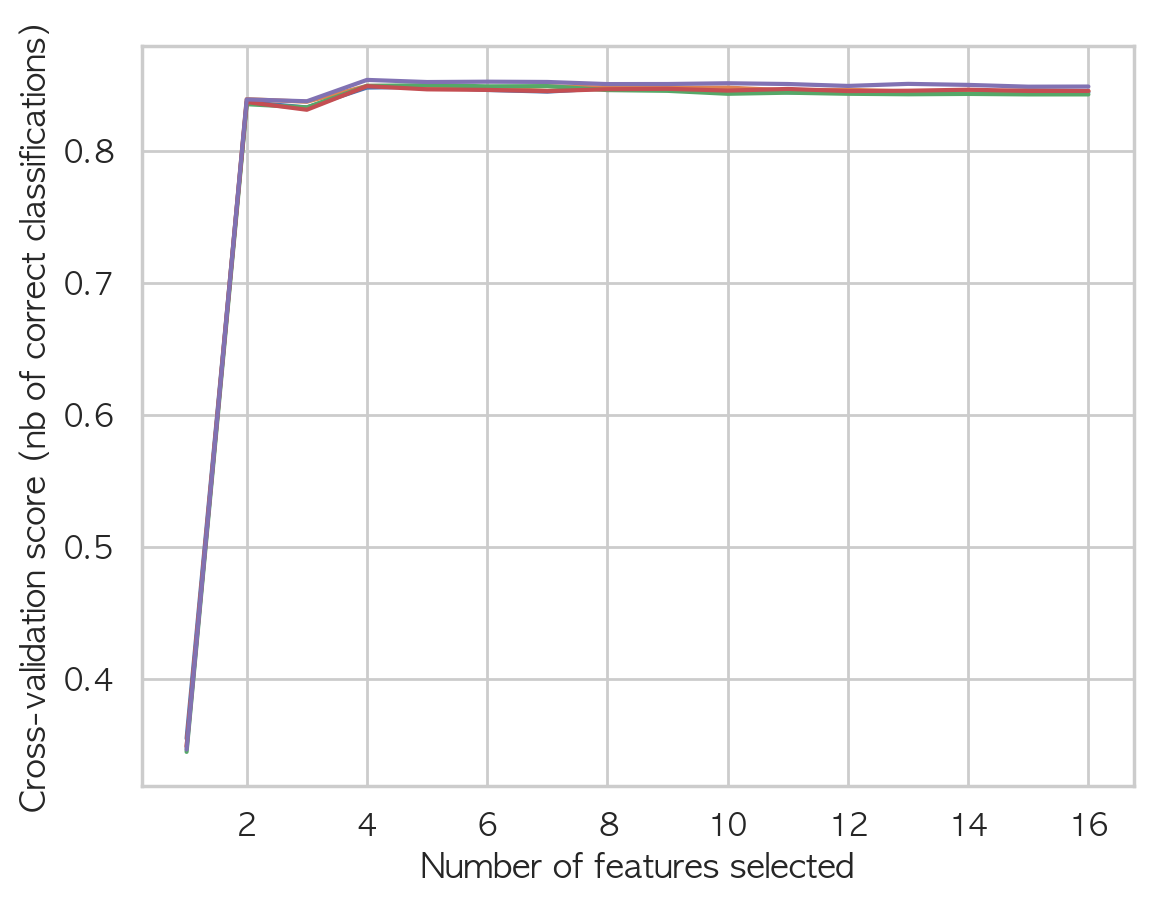

Selected Features: [False  True False False False False False False False  True  True False
 False False  True False]
Selected Features : ['대출기간', '총상환원금', '총상환이자', '총상환대출비율']


In [34]:
# 모델 및 RFECV 객체 생성
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1, n_jobs=-1) 
rfecv = RFECV(estimator=xgb_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')  
# 파라미터에 변수개수선택가능 min_features_to_select 설정가능

# RFECV 수행
selector = rfecv.fit(X, y)

# 특성 수에 따른 교차 검증 점수 시각화
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

# 선택된 특성 확인
selected_features = selector.support_
print("Selected Features:", selected_features)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_feature_indices]
print(f'Selected Features : {selected_feature_names}')

In [32]:
features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

In [33]:
# feature selection reason2. feature importances, SHAP values

In [34]:
xgb_model = XGBClassifier(random_state=42, n_estimators=600, max_depth=20, learning_rate=0.1, n_jobs=-1)
xgb_model.fit(X_train[features], y_train)

y_pred_train = xgb_model.predict(X_train[features])
y_pred_test = xgb_model.predict(X_test[features])
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.972390,0.972443
test,0.918252,0.918069


In [35]:
# selected feature로 모델링

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

xgb_model = XGBClassifier(n_estimators=600, max_depth=20, learning_rate=0.5, random_state = 42, n_jobs=-1)
xgb_model.fit(X_train[features], y_train)

y_pred_train = xgb_model.predict(X_train[features])
y_pred_test = xgb_model.predict(X_test[features])
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.972514,0.972565
test,0.920744,0.920581


In [37]:
from sklearn.metrics import plot_confusion_matrix

In [39]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

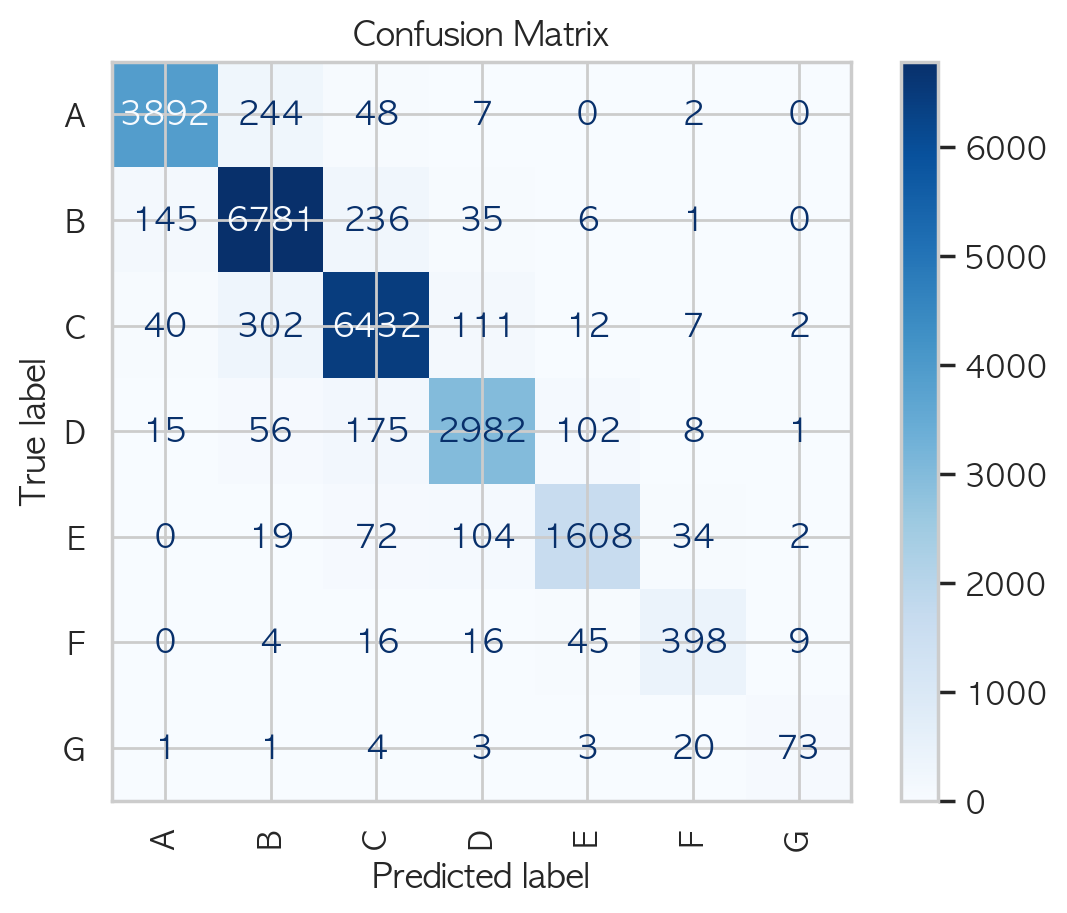

In [40]:
disp = plot_confusion_matrix(xgb_model, X_test[features], y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

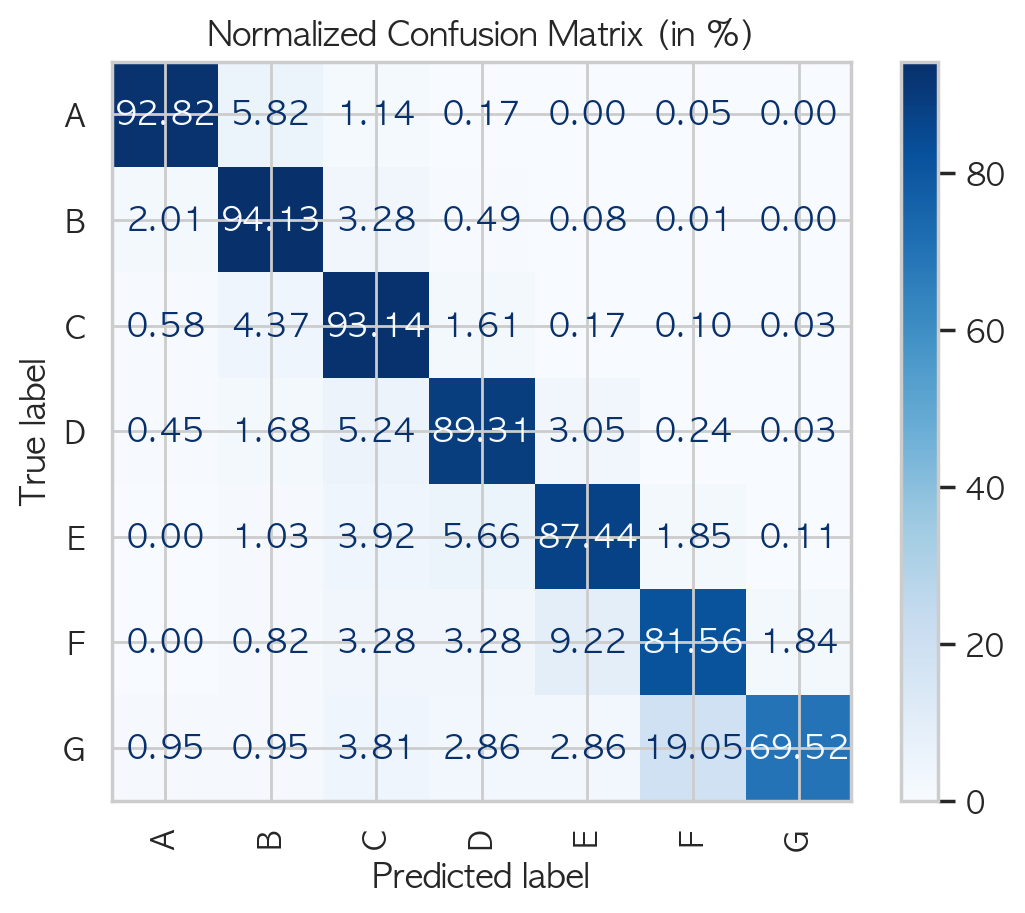

In [42]:
# Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred_test)

# 각 셀의 값을 전체 데이터 수로 나누어 백분율로 변환
cm_percent = cm / np.sum(cm, axis=1)[:, np.newaxis] * 100

# 클래스 이름 설정
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Confusion Matrix 그리기
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".2f", xticks_rotation='vertical')

plt.title('Normalized Confusion Matrix (in %)')
plt.show()

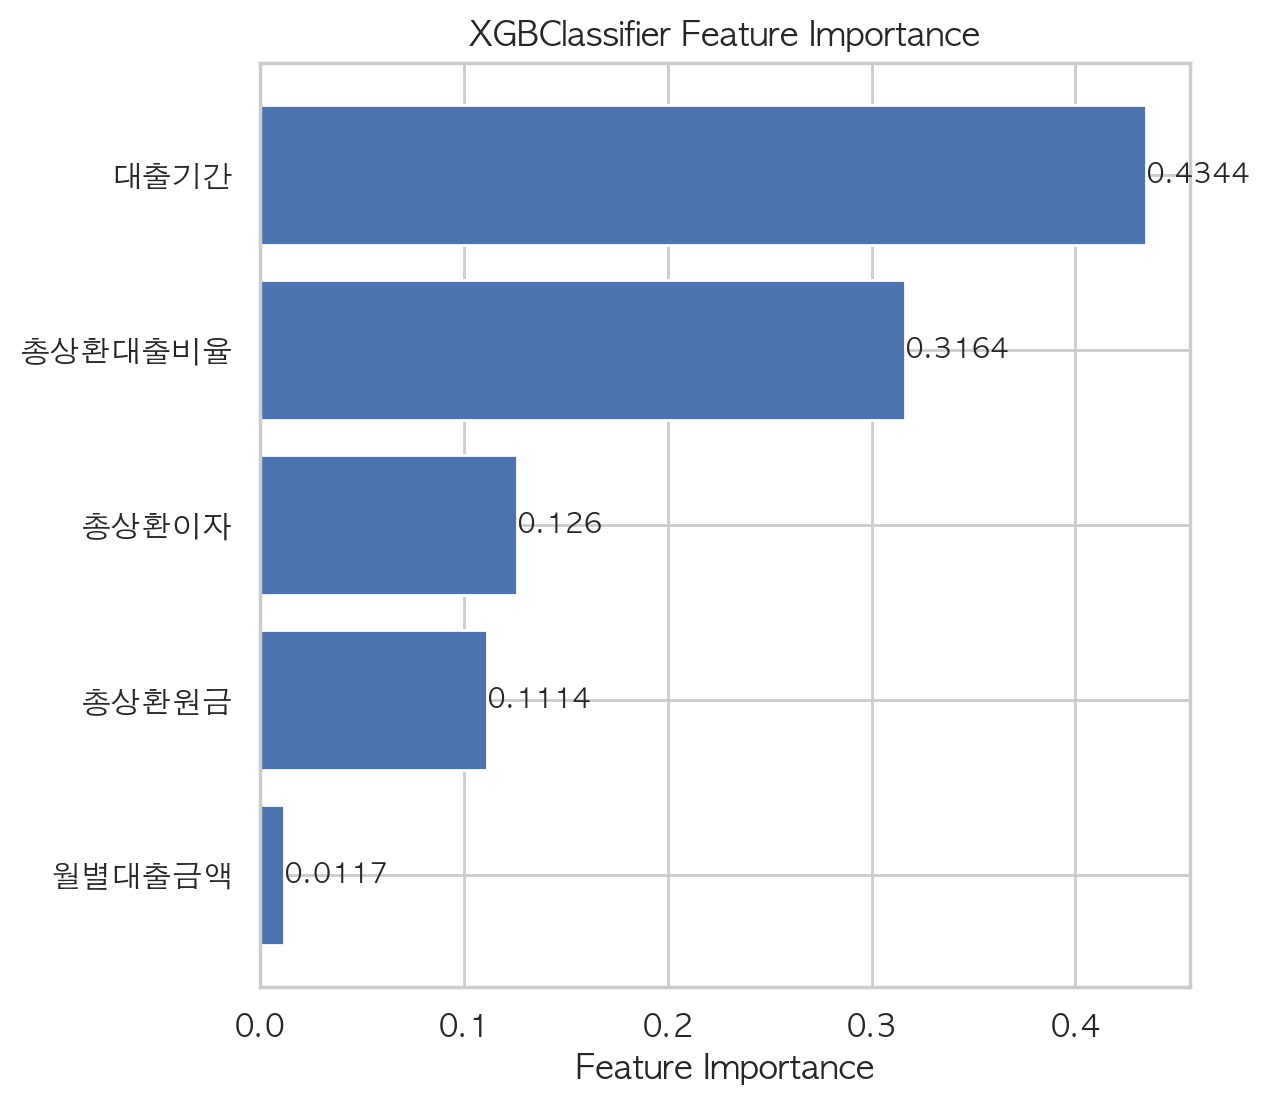

In [43]:
# feature importances 얻기
# 하지만 feature_importances_ 는 학습된 데이터를 기반으로 중요도를 알려주기 때문에 test set에 대해서는 알 수 없음, 즉, 4/5데이터에 대해서만 중요도를 알 수 있었음
feature_importances = xgb_model.feature_importances_

# feature importances를 피처 이름과 함께 DataFrame으로 만들기
feature_importance_df = pd.DataFrame({'Feature': X_train[features].columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# feature importances 시각화
plt.figure(figsize=(6, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

# 수치 표시
for bar, val in zip(bars, feature_importance_df['Importance']):
    plt.text(val, bar.get_y() + bar.get_height()/2, round(val, 4), va='center', ha='left', fontsize=10)

plt.xlabel('Feature Importance')
plt.title('XGBClassifier Feature Importance')
plt.show()

In [ ]:
# SHAP Values
#생성된 explainer를 사용하여 테스트 데이터 (X_test)에 대한 SHAP 값들을 계산.

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test[features])
shap.summary_plot(shap_values, X_test[features], plot_type="bar", class_names=class_names)

In [ ]:
# shap.summary_plot 그리기
shap.summary_plot(shap_values, X_test[features], plot_type="bar", class_names=class_names, show=False)

# 현재 그림(fig) 객체에 접근하여 크기 조절
plt.gcf().set_size_inches(7, 6)
plt.tight_layout()

# 그래프 표시
plt.show()

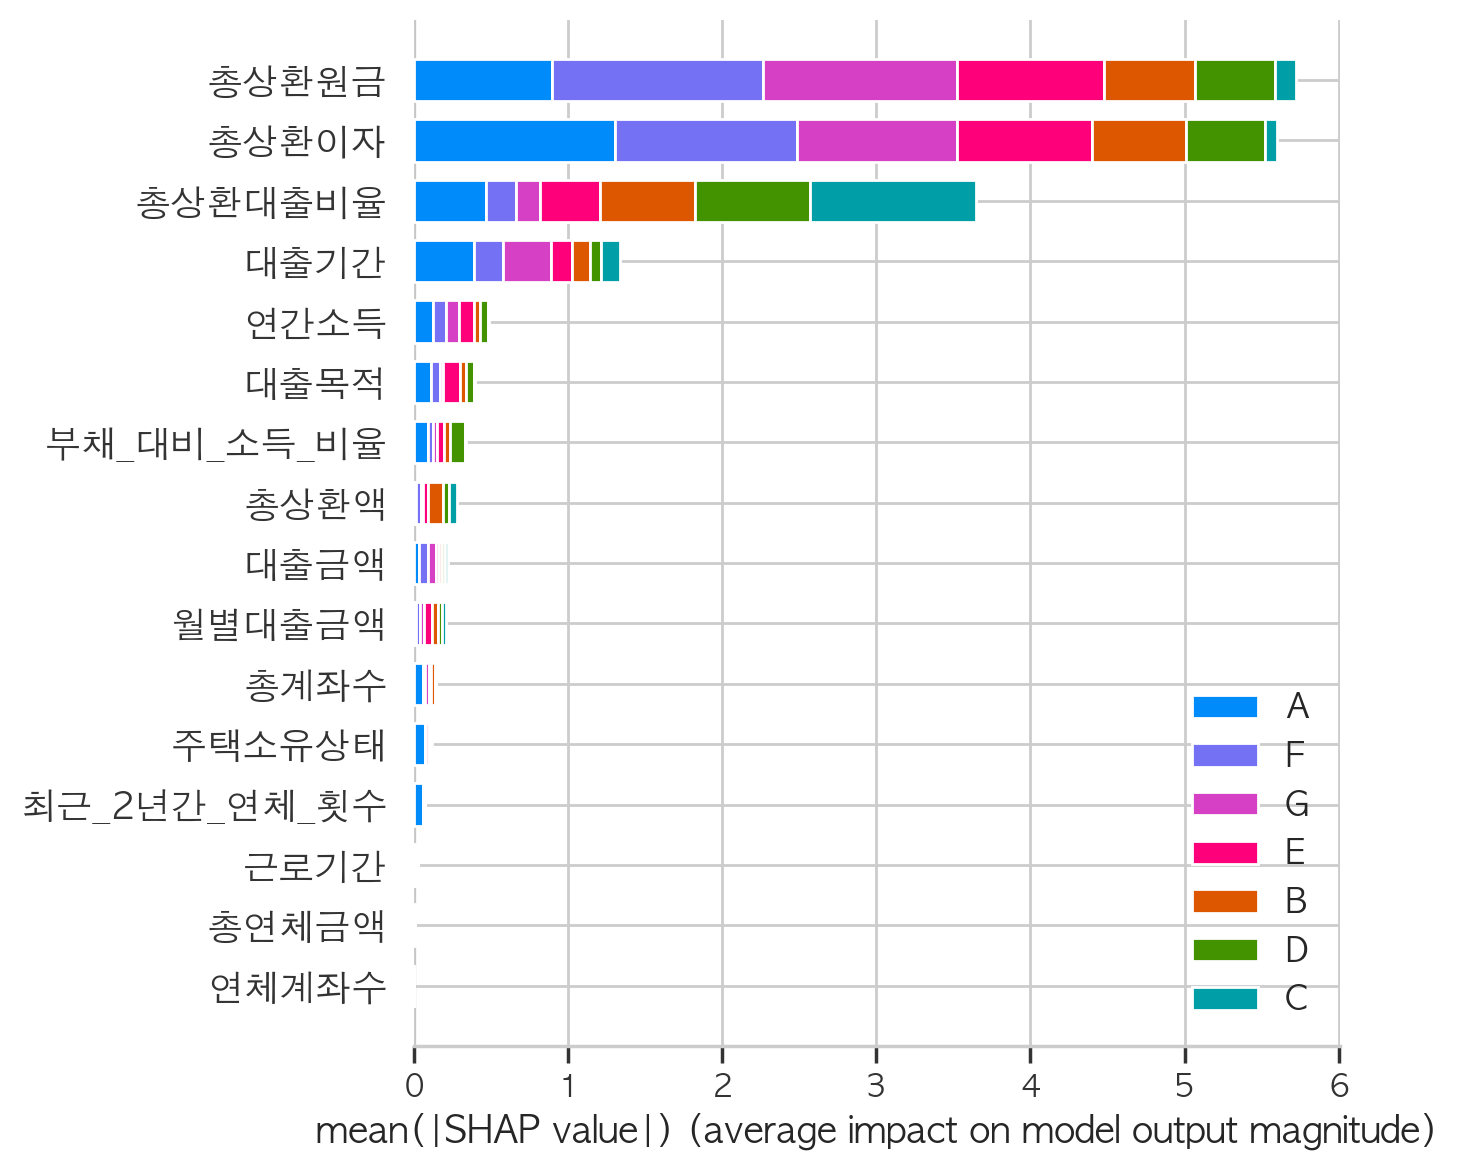

In [135]:
# shap.summary_plot 그리기
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=class_names, show=False)

# 현재 그림(fig) 객체에 접근하여 크기 조절
plt.gcf().set_size_inches(7, 6)
plt.tight_layout()

# 그래프 표시
plt.show()

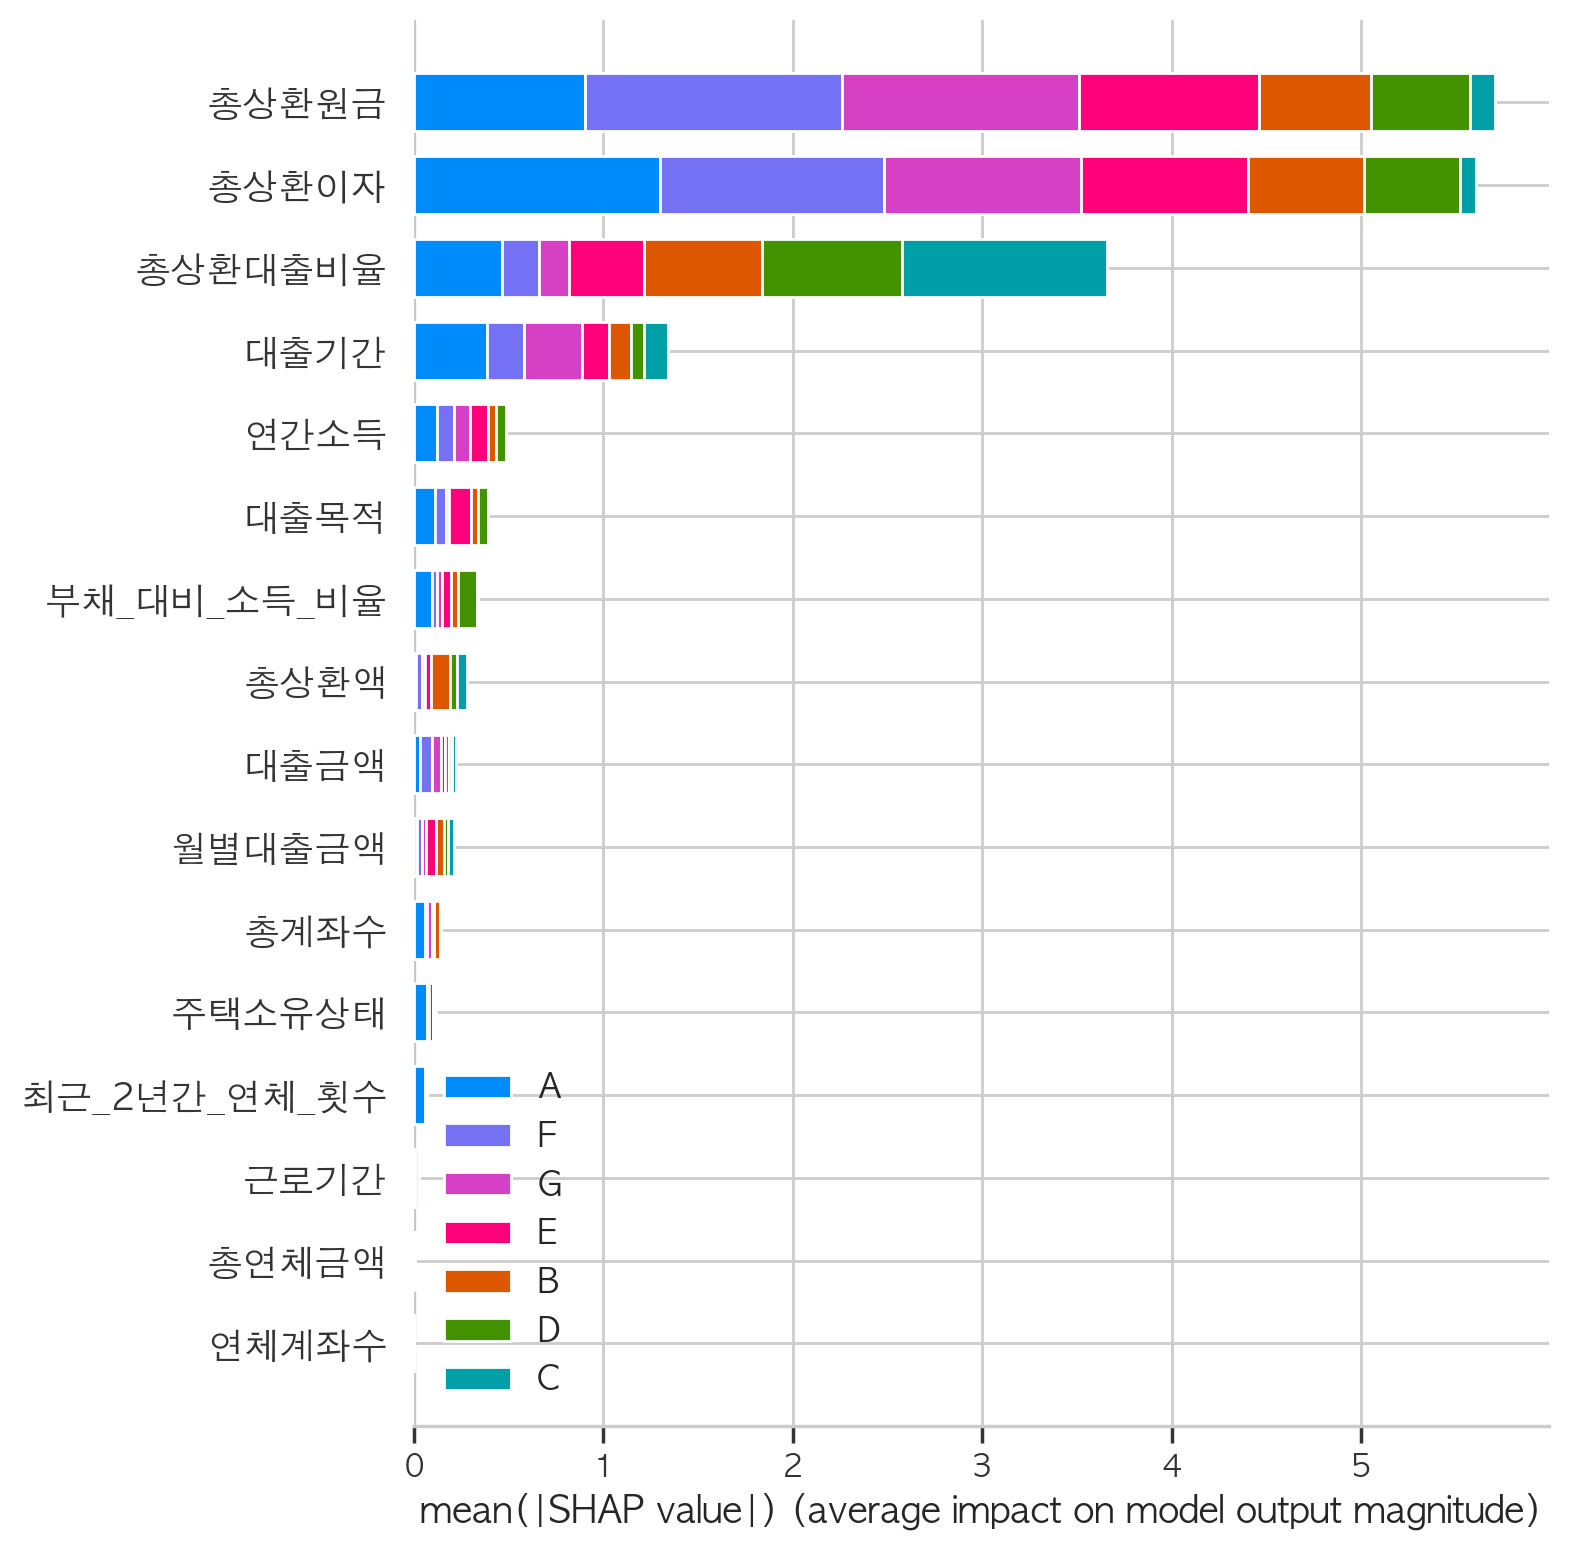

In [40]:
# train set도 한 번 확인

explainer2 = shap.TreeExplainer(xgb_model)
shap_values_train = explainer2.shap_values(X_train)
shap.summary_plot(shap_values_train, X_train, plot_type="bar", class_names=class_names)

In [56]:
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1, n_jobs=-1)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.860051,0.859994
test,0.844792,0.844364


In [57]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_test)

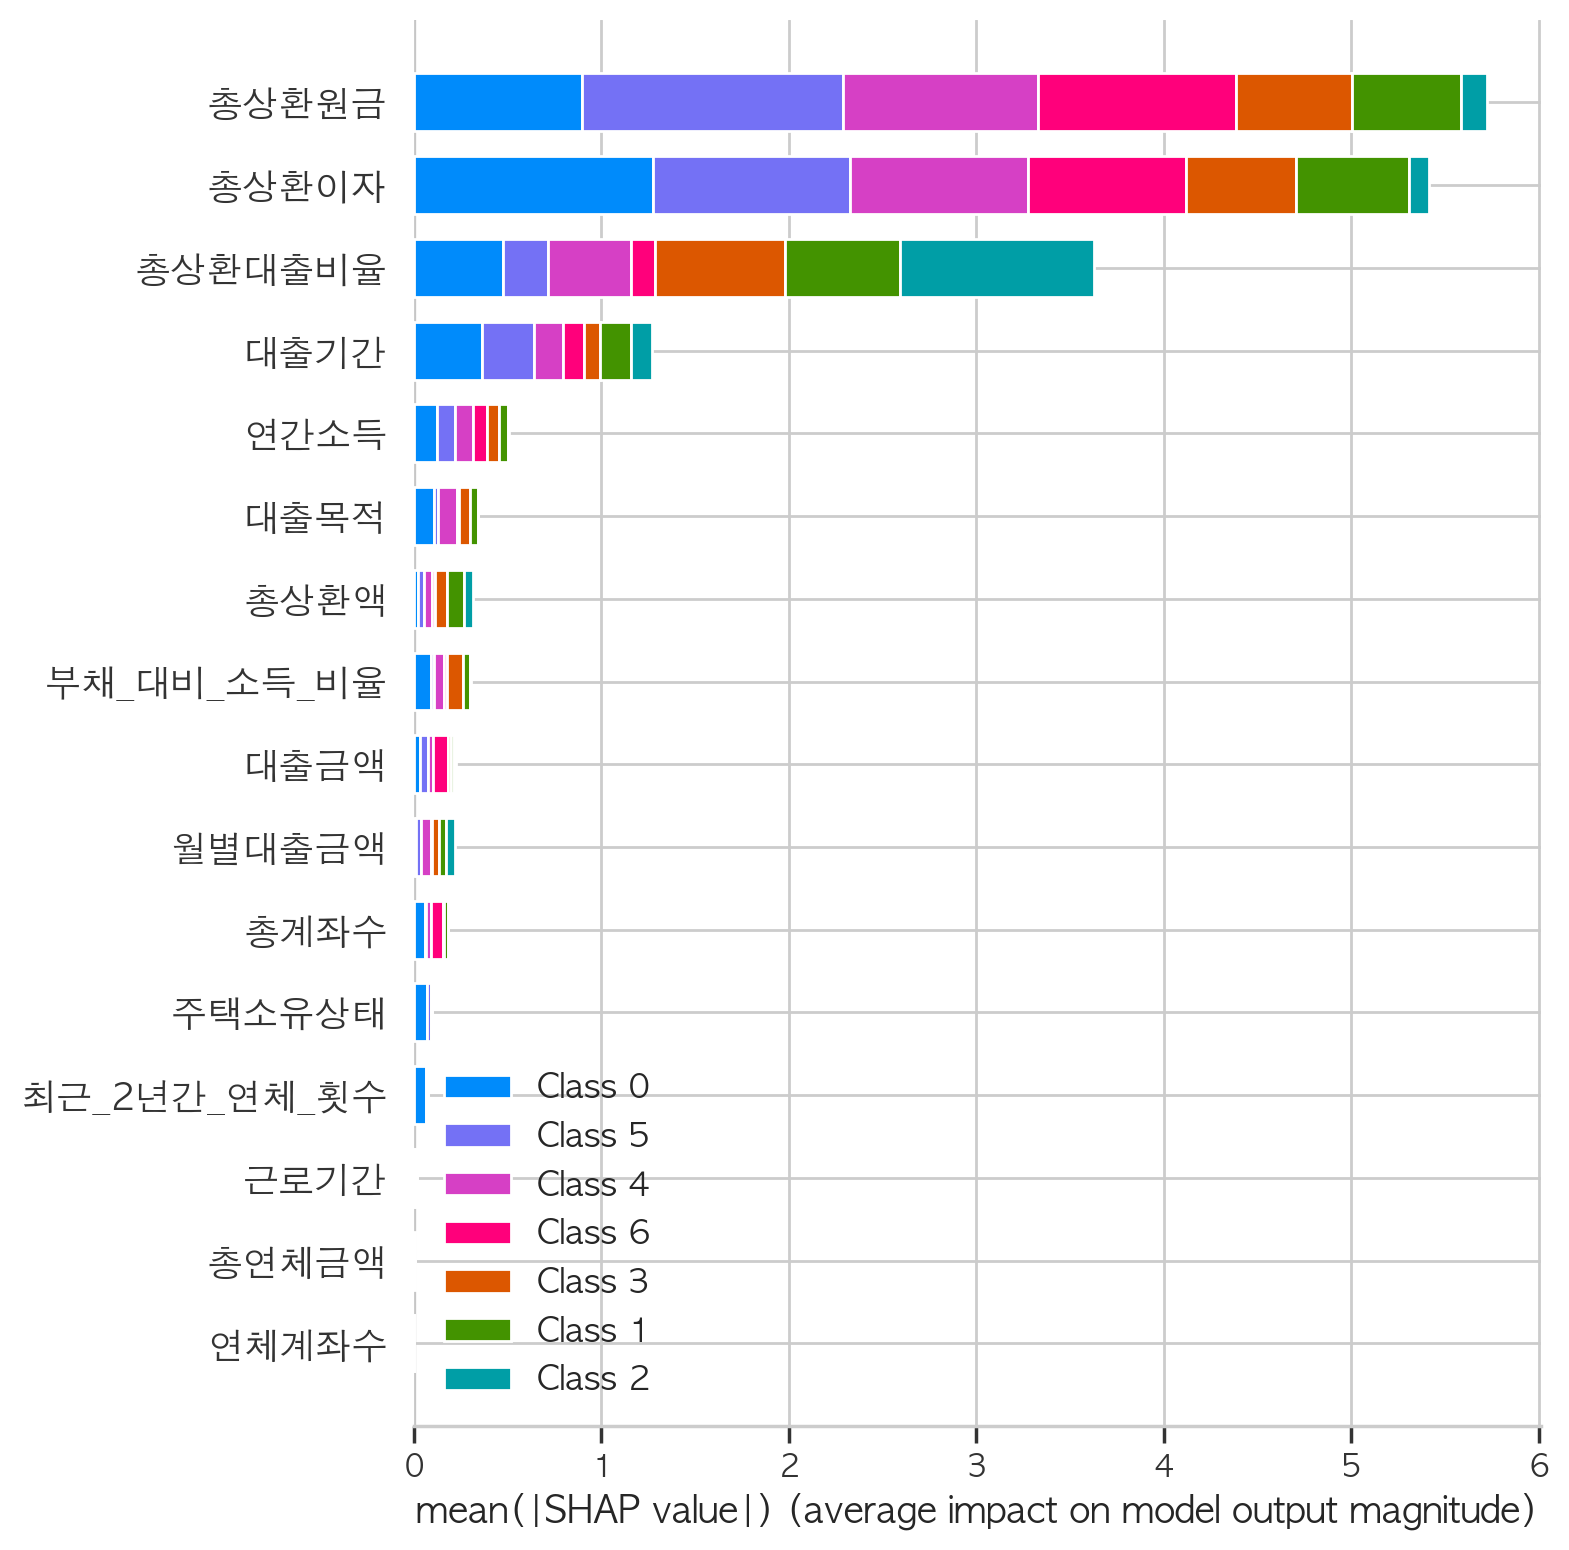

In [58]:
shap.summary_plot(shap_values, X_test)

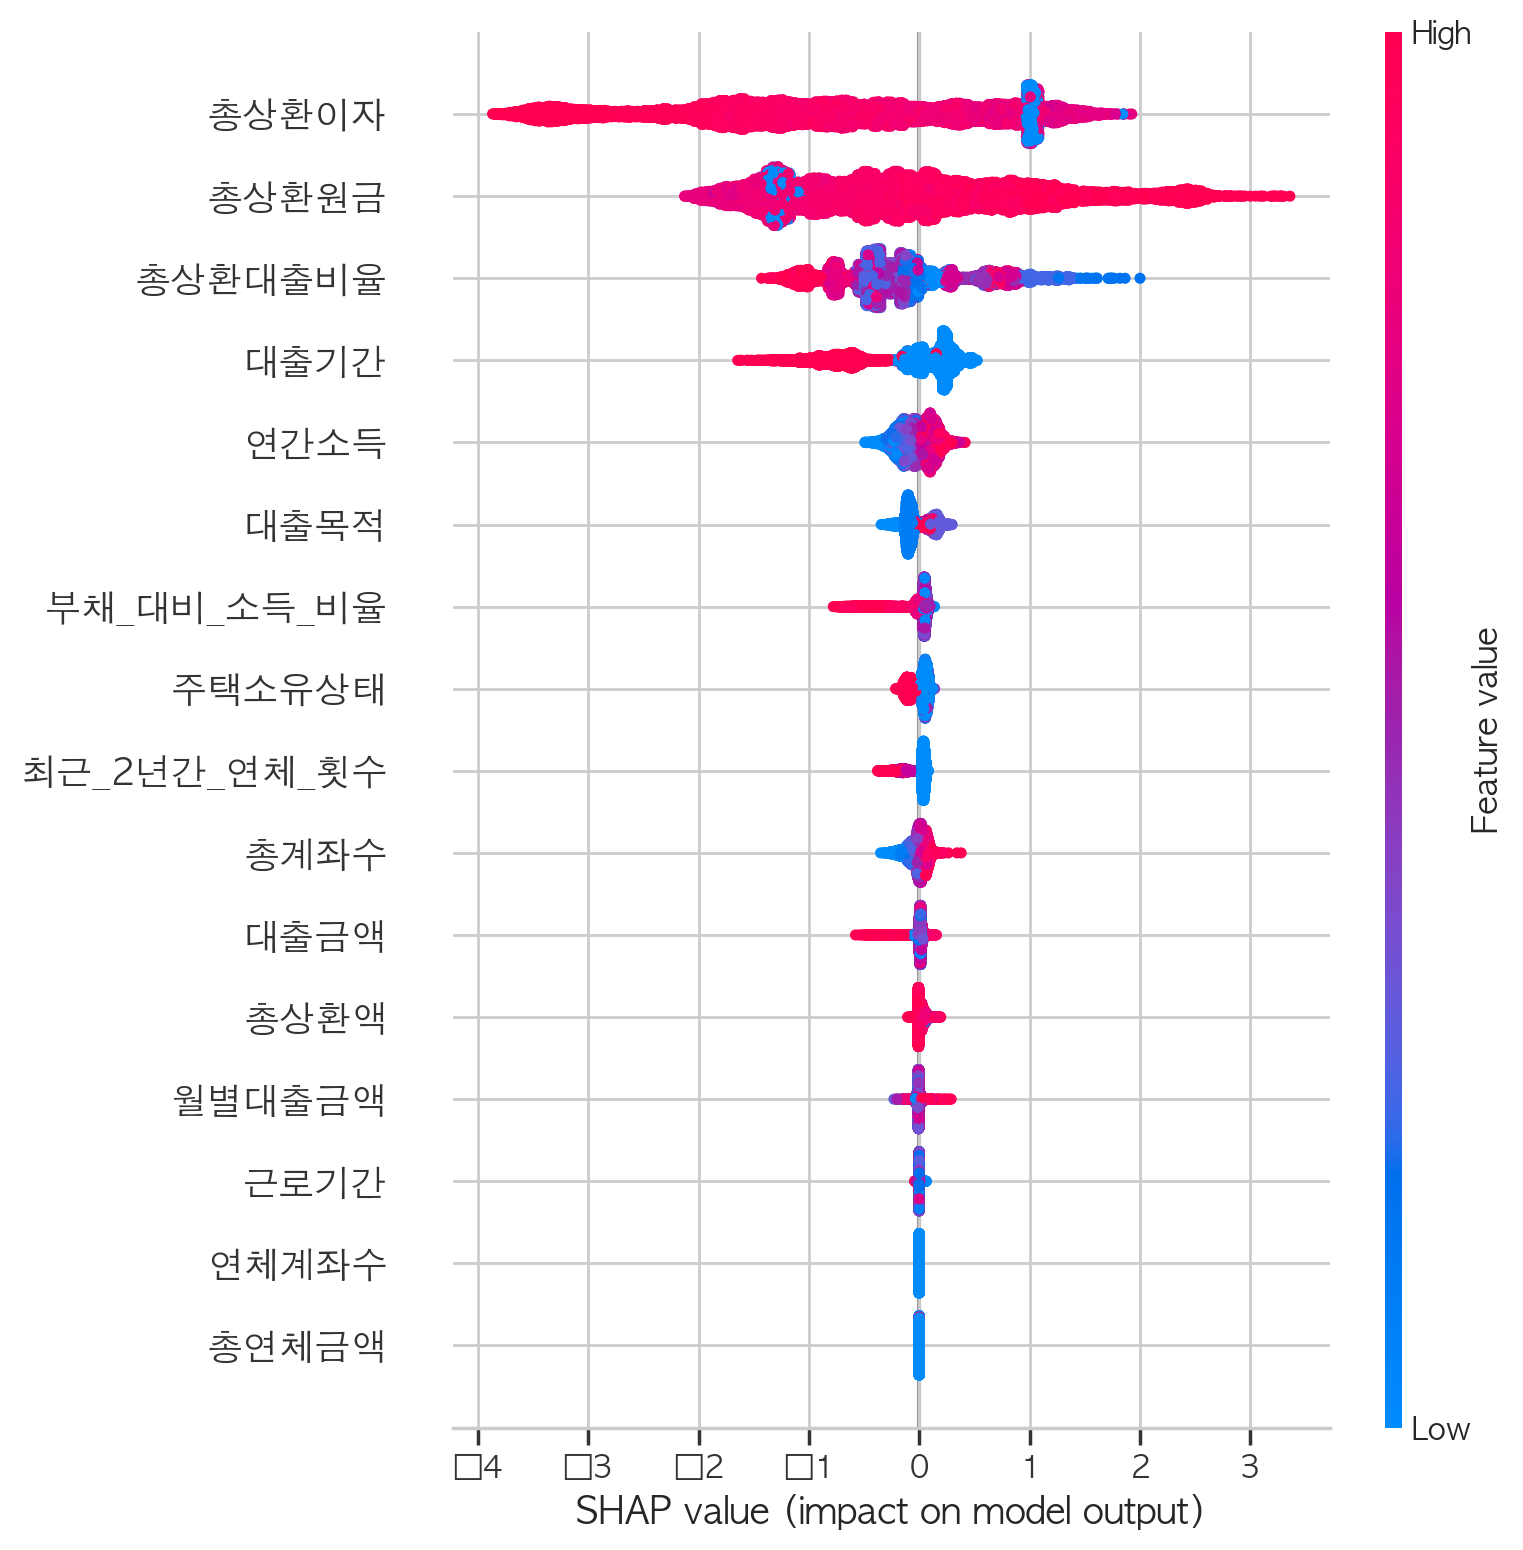

In [87]:
shap.summary_plot(shap_values[0], X_test)

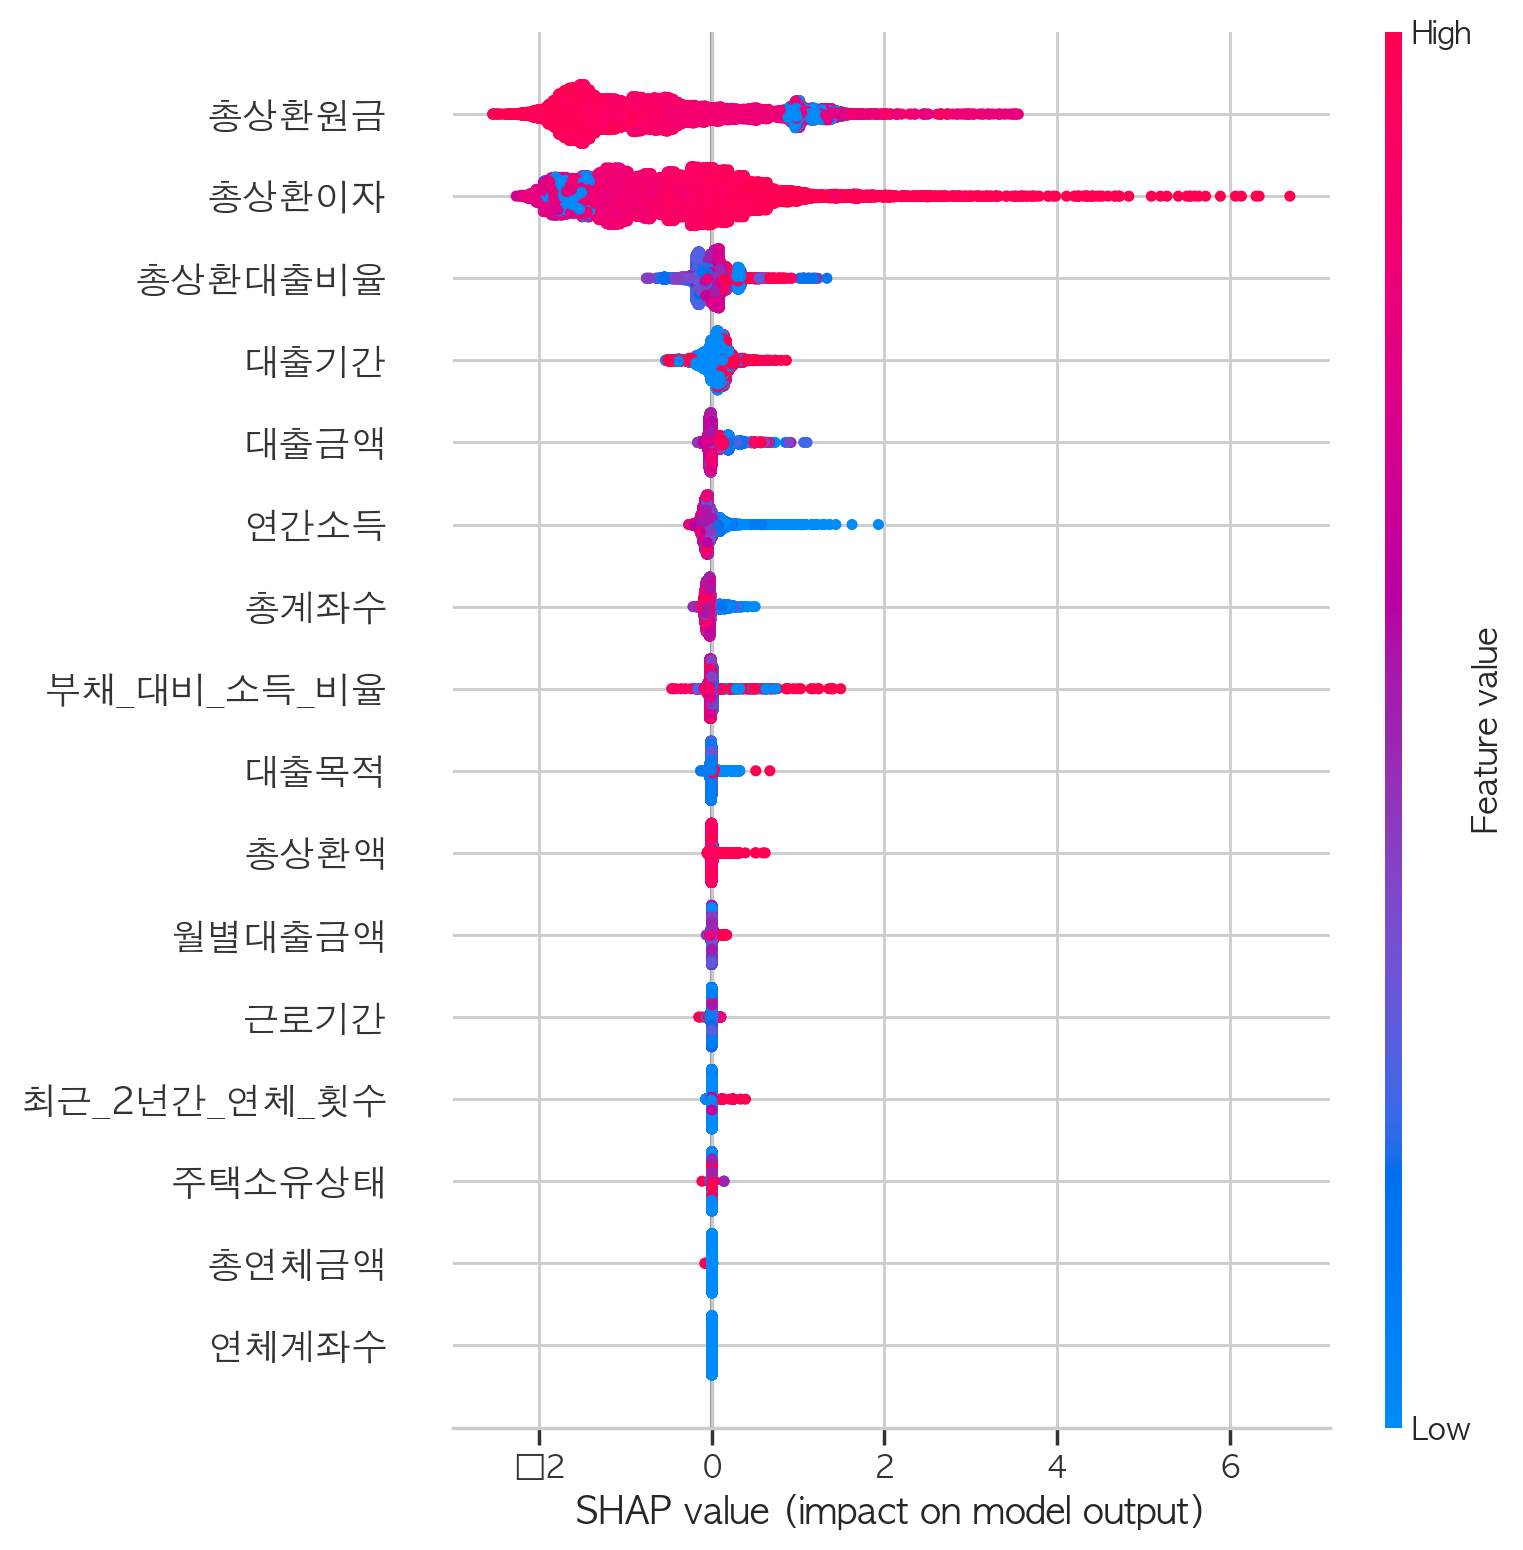

In [67]:
shap.summary_plot(shap_values[6], X_test)

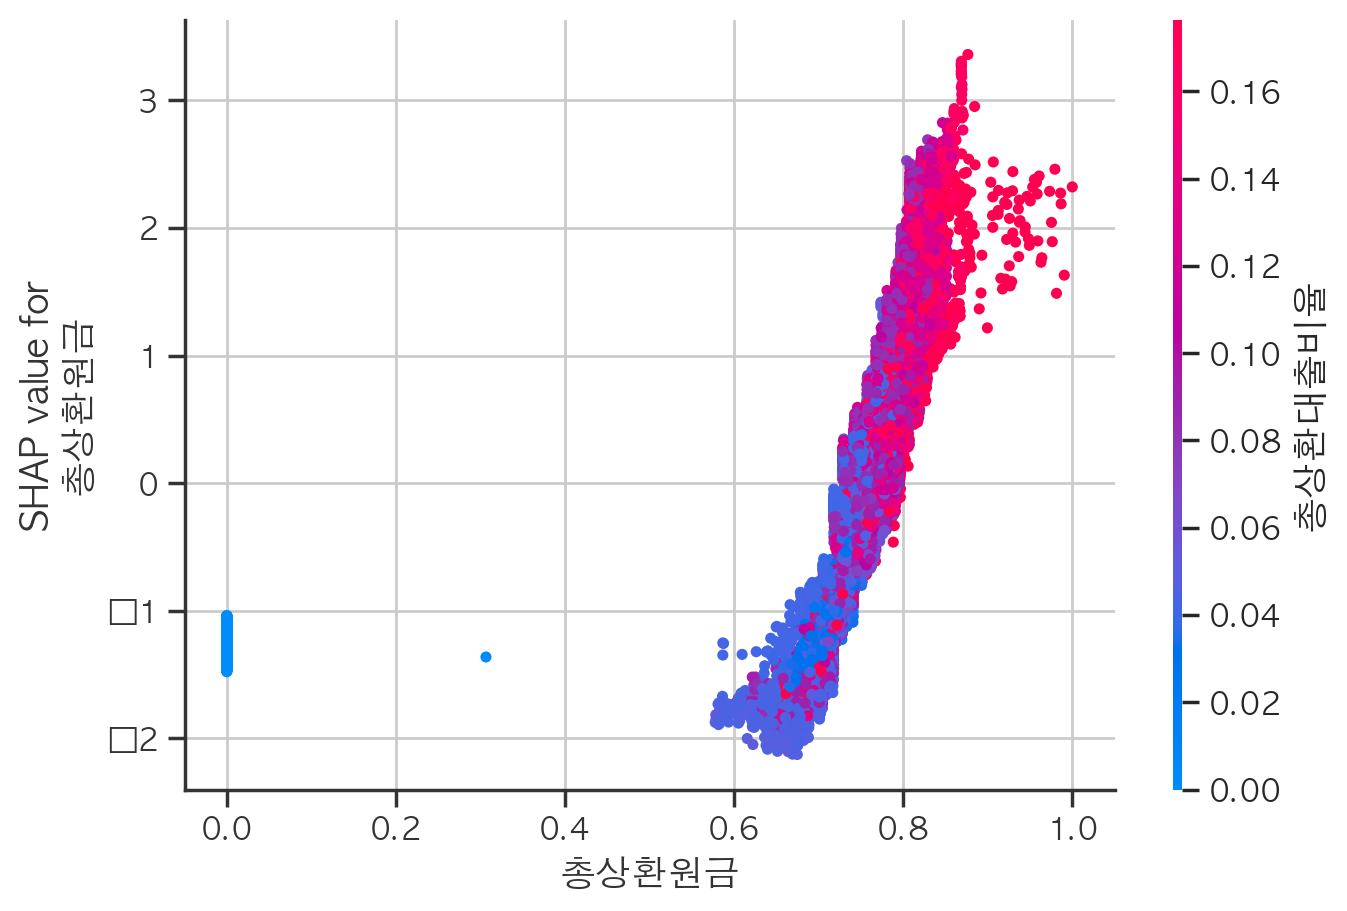

In [69]:
shap.dependence_plot("총상환원금", shap_values[0], X_test,interaction_index="총상환대출비율")

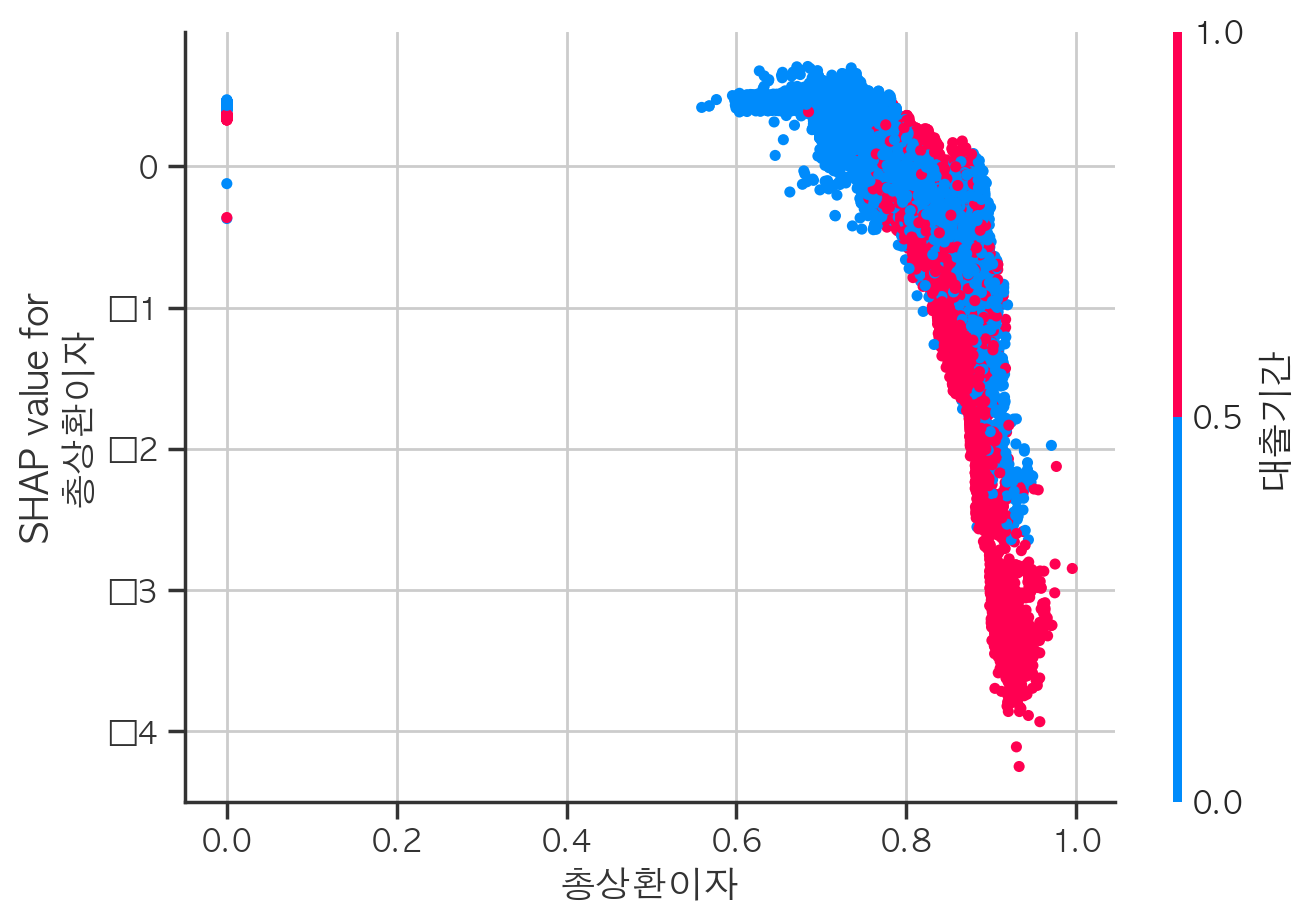

In [73]:
shap.dependence_plot("총상환이자", shap_values[1], X_test,interaction_index="대출기간")

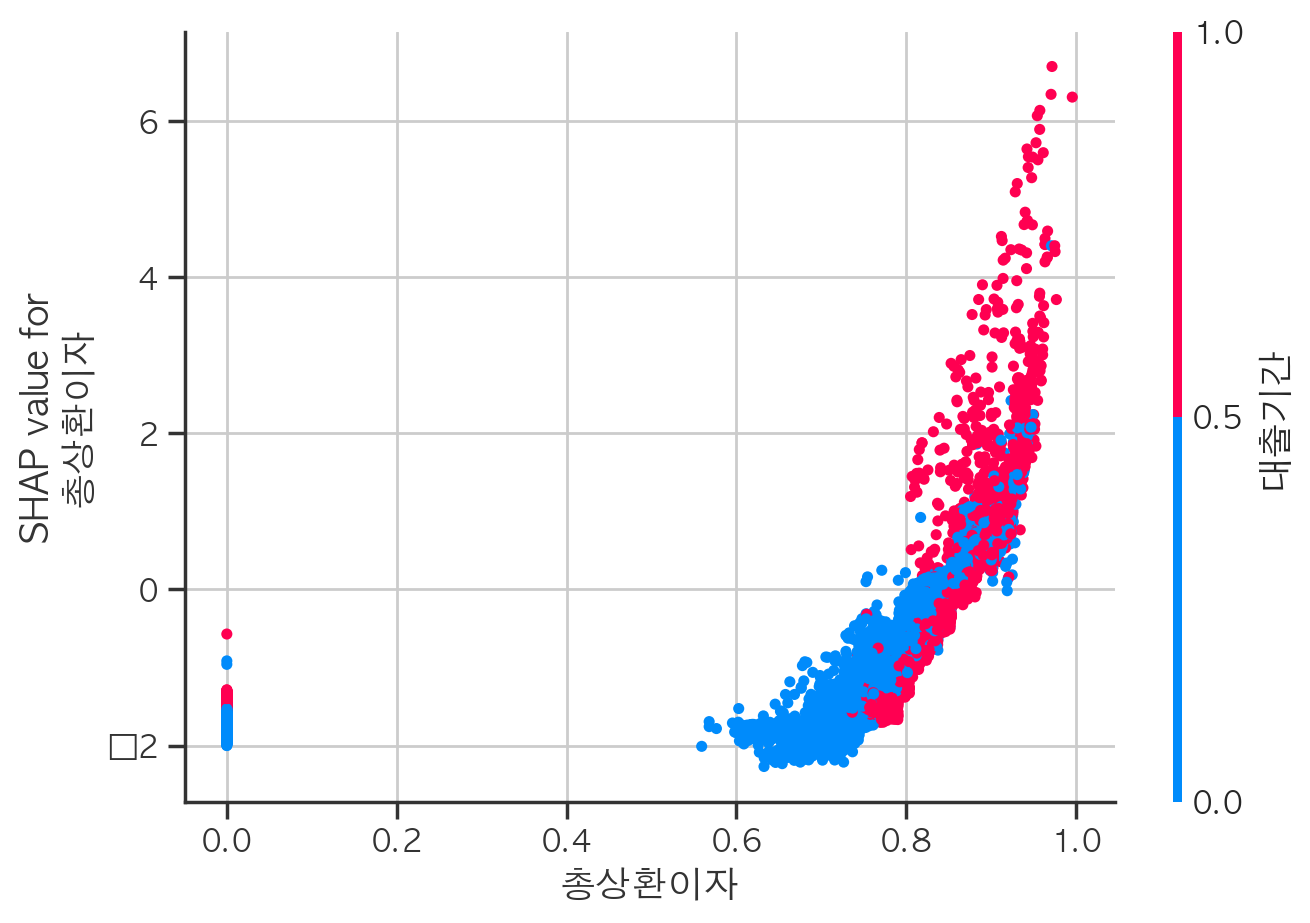

In [74]:
shap.dependence_plot("총상환이자", shap_values[6], X_test,interaction_index="대출기간")

In [41]:
# feature selection reason3. feature importances 확인 후 영향이 거의 없는 feature 제거 + 나머지 feature의 모든조합의 성능

In [42]:
# 필요함수생성 for 후진소거법, 조합

In [43]:
# 하나씩 빼는 함수 

def feature_elimination_by_one_modeling(X_train, X_test, y_train, y_test, features, clf, n_estimators=100, max_depth=5, learning_rate=0.1):

    i = 0

    feature_list = features
    
    results = {'used_feature': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

    while len(features) > 0 :
        
        model = clf(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        model.fit(X_train[features], y_train)

        y_pred_train = model.predict(X_train[features])
        y_pred_test = model.predict(X_test[features])

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
        test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

        results['used_feature'].append(features)
        results['train_accuracy'].append(train_accuracy)
        results['test_accuracy'].append(test_accuracy)
        results['train_f1'].append(train_f1_score)
        results['test_f1'].append(test_f1_score)

        features = features[:-1]

        i += 1
        print(f'progress: {i}/{len(feature_list)}', end='\r')

    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(by='test_accuracy', ascending=False)
    result_df.to_csv(f'result_{clf.__name__}_{n_estimators}_{max_depth}_{learning_rate}_elim_{feature_list}.csv') 
    
    return result_df

In [44]:
# 조합 함수

def feature_combination_modeling(X_train, X_test, y_train, y_test, features, clf, n_estimators=100, max_depth=5, learning_rate=0.1):

    i = 0

    feature_list = features
    
    results = {'used_feature': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

    all_combinations = []

    # Generate all combinations of features
    for r in range(1, len(features) + 1):
        feature_combinations = combinations(features, r)
        all_combinations.extend(feature_combinations)

    for features in all_combinations:
        features = list(features)
        
        model = clf(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        model.fit(X_train[features], y_train)

        y_pred_train = model.predict(X_train[features])
        y_pred_test = model.predict(X_test[features])

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
        test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

        results['used_feature'].append(features)
        results['train_accuracy'].append(train_accuracy)
        results['test_accuracy'].append(test_accuracy)
        results['train_f1'].append(train_f1_score)
        results['test_f1'].append(test_f1_score)
        
        i += 1
        print(f'progress: {i}/{len(all_combinations)}', end='\r')

    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(by='test_accuracy', ascending=False)
    result_df.to_csv(f'result_{clf.__name__}_{n_estimators}_{max_depth}_{learning_rate}_{feature_list}.csv') 
    
    return result_df

In [ ]:
# 모델 GradientBoostingClassifier : feature importances 확인 후 영향이 거의 없는 feature 제거 후 
# 총 7개의 features로 모든 조합의 성능을 확인

In [292]:
features = ['대출기간', '연간소득', '총상환원금', '총상환이자', '총상환액', '총상환대출비율', '월별대출금액']

In [293]:
result7 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, GradientBoostingClassifier)
result7 

,used_feature,train_accuracy,test_accuracy,train_f1,test_f1
110,"[대출기간, 총상환원금, 총상환이자, 총상환대출비율, 월별대출금액]",0.886844,0.865623,0.886948,0.865318
74,"[대출기간, 총상환원금, 총상환이자, 총상환대출비율]",0.885764,0.865000,0.885951,0.864847
124,"[대출기간, 총상환원금, 총상환이자, 총상환액, 총상환대출비율, 월별대출금액]",0.887315,0.864584,0.887437,0.864332
108,"[대출기간, 총상환원금, 총상환이자, 총상환액, 총상환대출비율]",0.886249,0.863961,0.886459,0.863799
126,"[대출기간, 연간소득, 총상환원금, 총상환이자, 총상환액, 총상환대출비율, 월별대출금액]",0.886401,0.862757,0.886463,0.862410
...,...,...,...,...,...
17,"[연간소득, 월별대출금액]",0.400366,0.358852,0.362276,0.314977
7,"[대출기간, 연간소득]",0.379415,0.356235,0.338366,0.310279
6,[월별대출금액],0.373794,0.354283,0.332676,0.310620
0,[대출기간],0.349645,0.345601,0.250736,0.247670


In [ ]:
# 모델 XGBClassifier : feature importances 확인 후 영향이 거의 없는 feature 제거 후 총 11개의 features로 모든 조합의 성능을 확인

In [304]:
features = ['대출기간', '총상환대출비율', '총상환이자', '총상환원금', '총상환액', '대출목적', '월별대출금액', '연간소득' , '부채_대비_소득_비율', '최근_2년간_연체_횟수', '대출금액']

In [305]:
result13 = feature_combination_modeling(X_train, X_test, y_train, y_test, features, XGBClassifier)
result13 

,used_feature,train_accuracy,test_accuracy,train_f1,test_f1
563,"[대출기간, 총상환대출비율, 총상환이자, 총상환원금, 월별대출금액]",0.863374,0.850087,0.863461,0.849897
1036,"[대출기간, 총상환대출비율, 총상환이자, 총상환원금, 월별대출금액, 최근_2년간_연...",0.863900,0.850004,0.863992,0.849804
567,"[대출기간, 총상환대출비율, 총상환이자, 총상환원금, 대출금액]",0.863651,0.849630,0.863709,0.849415
1830,"[대출기간, 총상환대출비율, 총상환이자, 총상환원금, 총상환액, 월별대출금액, 최근...",0.863803,0.849423,0.863900,0.849217
1492,"[대출기간, 총상환대출비율, 총상환이자, 총상환원금, 총상환액, 월별대출금액, 최근...",0.863000,0.849423,0.863080,0.849198
...,...,...,...,...,...
8,[부채_대비_소득_비율],0.329332,0.317770,0.241485,0.230372
63,"[부채_대비_소득_비율, 최근_2년간_연체_횟수]",0.331561,0.314530,0.244589,0.228684
61,"[연간소득, 최근_2년간_연체_횟수]",0.321494,0.307344,0.252683,0.238862
7,[연간소득],0.318974,0.307178,0.247291,0.236032


In [45]:
# 선택한 features : ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']
# 이유? : 성능이 제일 좋아서 
# XGBClassifier, GradientBoostingClassifier 두 모델 모두 동일한 features 조합에서 성능이 가장 좋았음

In [ ]:
# feature selection 이후 파라미터 조율

In [309]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']
max_depth=6

results = {'num_max_depth': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

while max_depth <= 20 :
    
    xgb_model = XGBClassifier(n_estimators=100, max_depth=max_depth, learning_rate=0.1, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['num_max_depth'].append(max_depth)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    max_depth += 1
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_changing_parameter.csv') 


In [310]:
result_df

,num_max_depth,train_accuracy,test_accuracy,train_f1,test_f1
0,6,0.886290,0.868115,0.886388,0.867966
1,7,0.905870,0.879580,0.906000,0.879405
2,8,0.924964,0.890130,0.925088,0.889899
3,9,0.938797,0.897400,0.938921,0.897188
4,10,0.950761,0.903215,0.950883,0.902997
5,11,0.958390,0.906746,0.958512,0.906510
6,12,0.963985,0.908657,0.964094,0.908442
7,13,0.966477,0.910277,0.966572,0.910067
8,14,0.968291,0.911357,0.968375,0.911144
9,15,0.969149,0.910484,0.969211,0.910294


In [313]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

learning_rate_list= [0.1, 0.05, 0.01]

results = {'learning_rate': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for learning_rate in learning_rate_list:
    
    xgb_model = XGBClassifier(n_estimators=200, max_depth=20, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['learning_rate'].append(learning_rate)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_changing_LR.csv') 

In [314]:
result_df

,learning_rate,train_accuracy,test_accuracy,train_f1,test_f1
0,0.10,0.971503,0.916424,0.971557,0.916236
1,0.05,0.970756,0.913807,0.970808,0.913627
2,0.01,0.955372,0.901720,0.955408,0.901532


In [328]:
i = 0

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

n_estimators_list= [100, 200, 300, 400, 500, 600, 700, 800]

results = {'n_estimators': [], 'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

for n_estimators in n_estimators_list:
    
    xgb_model = XGBClassifier(n_estimators=n_estimators, max_depth=20, learning_rate=0.5, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train[features], y_train)

    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['n_estimators'].append(n_estimators)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)
    
    i += 1
    print(f'progress: {i}', end='\r')

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_fixed_features_LR05_changing_em.csv') 

In [329]:
result_df

,n_estimators,train_accuracy,test_accuracy,train_f1,test_f1
0,100,0.972362,0.917587,0.972414,0.917405
1,200,0.972514,0.919332,0.972567,0.919170
2,300,0.972514,0.919914,0.972565,0.919744
3,400,0.972514,0.920329,0.972568,0.920171
4,500,0.972514,0.920287,0.972568,0.920126
5,600,0.972514,0.920744,0.972565,0.920581
6,700,0.972514,0.920620,0.972566,0.920455
7,800,0.972514,0.920661,0.972568,0.920498


In [ ]:
# best model, parameter = XGBClassifier, [n_estimators=600, max_depth=20, learning_rate=0.5]

In [46]:
# 모든 feature 사용했을 때

xgb_model = XGBClassifier(n_estimators=600, max_depth=20, learning_rate=0.5, random_state = 42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,1.000000,1.00000
test,0.903921,0.90365


In [47]:
# selected feature로 모델링

features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

xgb_model = XGBClassifier(n_estimators=600, max_depth=20, learning_rate=0.5, random_state = 42, n_jobs=-1)
xgb_model.fit(X_train[features], y_train)

y_pred_train = xgb_model.predict(X_train[features])
y_pred_test = xgb_model.predict(X_test[features])
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.972514,0.972565
test,0.920744,0.920581


In [48]:
# 모델 성능 검증
# 방법 1. StratifiedKFold 사용
# 방법 2. cross_val_score 사용

In [50]:
results = {'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in stratified_kfold.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # XGBoost 모델 생성
    xgb_model = XGBClassifier(n_estimators=600,
                              max_depth=20, learning_rate=0.5,
                              random_state=42, n_jobs=-1)
    
    # 모델 훈련
    xgb_model.fit(X_train[features], y_train)
    
    # 예측
    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])
    
    # 성능 평가 및 결과 저장
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_final_kfold.csv') 

In [51]:
result_df

,train_accuracy,test_accuracy,train_f1,test_f1
0,0.972597,0.915832,0.972655,0.915638
1,0.972103,0.923620,0.972158,0.923432
2,0.972142,0.920712,0.972190,0.920576
3,0.972441,0.922058,0.972484,0.921919
4,0.971896,0.921487,0.971949,0.921311


In [54]:
# 비교(코드작성 궁금한 부분)

# XGBoost 모델 생성
xgb_model = XGBClassifier(n_estimators=600, max_depth=20, learning_rate=0.5, random_state=42, n_jobs=-1)

results = {'train_accuracy': [], 'test_accuracy': [], 'train_f1': [], 'test_f1': []}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in stratified_kfold.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 모델 훈련
    xgb_model.fit(X_train[features], y_train)
    
    # 예측
    y_pred_train = xgb_model.predict(X_train[features])
    y_pred_test = xgb_model.predict(X_test[features])
    
    # 성능 평가 및 결과 저장
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_f1'].append(train_f1_score)
    results['test_f1'].append(test_f1_score)

result_df = pd.DataFrame(results)
result_df.to_csv('result_xgb_final_kfold.csv') 

In [55]:
result_df

,train_accuracy,test_accuracy,train_f1,test_f1
0,0.972597,0.915832,0.972655,0.915638
1,0.972103,0.923620,0.972158,0.923432
2,0.972142,0.920712,0.972190,0.920576
3,0.972441,0.922058,0.972484,0.921919
4,0.971896,0.921487,0.971949,0.921311


In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
features = ['대출기간', '총상환원금', '총상환이자', '총상환대출비율', '월별대출금액']

# XGBoost 모델 생성
xgb_model = XGBClassifier(n_estimators=600,
                          max_depth=20, learning_rate=0.5,
                          random_state=42, n_jobs=-1)

# cross_val_score를 사용하여 5-fold 교차 검증 수행
cv_results = cross_val_score(xgb_model, X[features], y, cv=5, scoring='accuracy')

# 교차 검증 결과 출력
print("Cross-validated Accuracy:", cv_results)
print("Mean Accuracy:", cv_results.mean())


Cross-validated Accuracy: [0.92060855 0.92112778 0.92242588 0.92018901 0.9240835 ]
Mean Accuracy: 0.921686944000313
